- Describe / plot
- Indexing & Masking
- Exercice : Feature engineering = Creer des categories d'ages
- Correction : Bonus, utiliser la fonction Map()


# PANDAS

[video 17](https://www.youtube.com/watch?v=zZkNOdBWgFQ)

Recuperation du dataset du Titanic dans [Kaggle](https://www.kaggle.com/datasets/vinicius150987/titanic3?resource=download)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
tit_ds = pd.read_excel('./assets/titanic_ds/titanic3.xls')

In [3]:
tit_ds.shape

(1309, 14)

__N.B : Pandas s'est construit sur la base de Numpy__

In [4]:
tit_ds.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [5]:
tit_ds.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
# On elimine certaines colonnes inutiles pour optimiser le caclul
# On precise l'axe pour droper des elements !!
tit_ds = tit_ds.drop(['ticket', 'name', 'sibsp', 'parch', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)
tit_ds.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


#### Dataframe.describe()

In [7]:
tit_ds.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


On voit qu'une colonne, "age", compte moins d'elements que les deux autres. Cela veut dire que les donnees sont incompletes.

2 possibilites : 
1. La fonction _fillna()_ qui permet de remplacer les donnees absentes par une valeur par defaut. (on corromp la realite)
2. La fonction _dropna()_ qui permet d'eliminer les lignes avec N/A

In [8]:
# Exemple : s'il nous manque une donnee et qu'on veut la remplacer par l'age moyen : 
# tit_ds = tit_ds.fillna(tit_ds['age'].mean())
tit_ds = tit_ds.dropna(axis=0) # Par defaut dropna() travaillera sur l'axe 0, mais c'est toujours mieux de le preciser
# On aurait pu ecrire : tit_ds.dropna(axis=0, inplace = True)
tit_ds.describe()

,pclass,survived,age
count,1046.000000,1046.000000,1046.000000
mean,2.207457,0.408222,29.881135
std,0.841497,0.491740,14.413500
min,1.000000,0.000000,0.166700
25%,1.000000,0.000000,21.000000
50%,2.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


__N.B : Les statistiques du tableau ont change. Il est important de preciser l'ensemble sur lequel on travaille__

<AxesSubplot:>

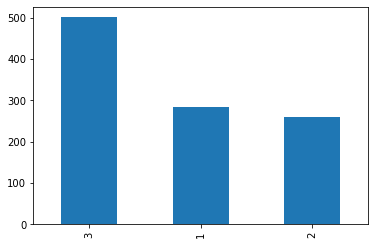

In [9]:
tit_ds['pclass'].value_counts().plot.bar() # Pandas a implemente de base les fonctions de matplotlib
# Pour plus de performance, utiliser seaborn

<AxesSubplot:>

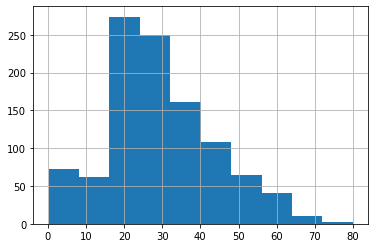

In [10]:
tit_ds['age'].hist()

#### Dataframe.groupby()

In [11]:
tit_ds.groupby(['sex']).mean()

,pclass,survived,age
sex,,,
female,2.048969,0.752577,28.687071
male,2.300912,0.205167,30.585233


In [12]:
tit_ds.groupby(['sex', 'pclass']).mean()

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

Pandas dispose de deux structures de donnees :

1. Le dataframe (un compose de series)
2. La serie (une colonne de dataframe) : Tableau numpy a 1 dimension, auquel on a ajoute une colonne d'index. Mais l'index n'est pas forcement unique et on peut s'amuser a le definir en fonction d'une colonne specifique.

In [13]:
data = pd.read_excel('./assets/titanic_ds/titanic3.xls')
data = data.set_index('name')
data.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
name,,,,,,,,,,,,,
"Allen, Miss. Elisabeth Walton",1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
"Allison, Master. Hudson Trevor",1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
"Allison, Miss. Helen Loraine",1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
"Allison, Mr. Hudson Joshua Creighton",1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


On peut assembler les series ensemble lorsqu'elles partagent un meme index.

__Dataframe = un dictionnaire qui contient des series__

### Indexing et slicing de Dataframe

In [14]:
dato = pd.read_excel('./assets/titanic_ds/titanic3.xls')

#### Indexing

In [15]:
dato['age'][0:10]

0    29.0000
1     0.9167
2     2.0000
3    30.0000
4    25.0000
5    48.0000
6    63.0000
7    39.0000
8    53.0000
9    71.0000
Name: age, dtype: float64

#### Boolean Masking

In [16]:
dato[dato['age'] < 18]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
53,1,0,"Carrau, Mr. Jose Pedro",male,17.0000,0,0,113059,47.1000,NaN,S,NaN,NaN,"Montevideo, Uruguay"
54,1,1,"Carter, Master. William Thornton II",male,11.0000,1,2,113760,120.0000,B96 B98,S,4,NaN,"Bryn Mawr, PA"
55,1,1,"Carter, Miss. Lucile Polk",female,14.0000,1,2,113760,120.0000,B96 B98,S,4,NaN,"Bryn Mawr, PA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,3,0,"Van Impe, Miss. Catharina",female,10.0000,0,2,345773,24.1500,NaN,S,NaN,NaN,NaN
1275,3,0,"Vander Planke, Mr. Leo Edmondus",male,16.0000,2,0,345764,18.0000,NaN,S,NaN,NaN,NaN
1279,3,0,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0000,0,0,350406,7.8542,NaN,S,NaN,NaN,NaN
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0000,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN


#### Identifier les passagers mineurs et les regrouper en fonction d'autres colonnes

In [17]:
dato[dato['age'] < 18]['pclass'].value_counts()

3    106
2     33
1     15
Name: pclass, dtype: int64

In [18]:
dato[dato['age'] < 18].groupby(['pclass', 'sex']).mean()

survived        age     sibsp     parch        fare   body
pclass sex                                                               
1      female  0.875000  14.125000  0.500000  0.875000  104.083337    NaN
       male    0.857143   9.845243  0.571429  1.714286  129.752371    NaN
2      female  1.000000   8.273150  0.666667  1.166667   27.998844    NaN
       male    0.733333   6.222220  0.600000  0.933333   31.750280    NaN
3      female  0.543478   8.416667  1.456522  1.043478   18.284148  328.0
       male    0.233333   9.838888  1.966667  1.016667   21.677570   65.5

#### Extracting subdtf

In [19]:
dato[['age', 'pclass']]

,age,pclass
0,29.0000,1
1,0.9167,1
2,2.0000,1
3,30.0000,1
4,25.0000,1
...,...,...
1304,14.5000,3
1305,NaN,3
1306,26.5000,3
1307,27.0000,3


#### Pour se rapprocher de l'indexing sur numpy

In [20]:
dato.iloc[0:2,0:2]

,pclass,survived
0,1,1
1,1,1


In [21]:
dato.loc[0:2, ['age', 'sex']]

,age,sex
0,29.0000,female
1,0.9167,male
2,2.0000,female


In [22]:
# si on desire selectionner toutes les colonnes :
dato.loc[0:2]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [23]:
# Mais c'est mieux d'etre tres explicite pour relire son code :
dato.loc[0:2, :]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# Exercice : Feature engineering = creer des catgories d'ages

Modifier la colonne age pour avoir 4 categories :
1. cat0 = < 20 ans
2. cat1 = 20 - 30 ans
3. cat2 = 30 - 30 ans
4. cat3 = > 40 ans

In [24]:
data = pd.read_excel('./assets/titanic_ds/titanic3.xls')
data.shape

(1309, 14)

In [25]:
# Retourne les index des personnes ayant moins de 20 ans : dato[dato['age'] < 20].index
data.loc[data[data['age'] < 20].index, 'age'] = 0 # permet de modifier tous les ages des index concernes
tmpdtf = data[data['age'] > 0]
tmpdtf = tmpdtf[tmpdtf['age'] < 30]
data.loc[tmpdtf.index, 'age'] = 1
tmpdtf = data[data['age'] > 1]
tmpdtf = tmpdtf[tmpdtf['age'] < 40]
data.loc[tmpdtf.index, 'age'] = 2
data.loc[data[data['age'] > 2].index, 'age'] = 3
data['age'].value_counts()


1.0    344
3.0    245
2.0    232
0.0    225
Name: age, dtype: int64

In [26]:
data.shape

(1309, 14)

In [27]:
data = data.dropna(axis=0 , subset=['age'])
data.shape

(1046, 14)

# Correction 

In [31]:
data = pd.read_excel('./assets/titanic_ds/titanic3.xls')
data.shape

(1309, 14)

In [32]:
data.loc[data['age'] <= 20, 'age'] = 0
data.loc[(data['age'] > 20) & (data['age'] <= 30), 'age'] = 1
data.loc[(data['age'] > 30) & (data['age'] <= 40), 'age'] = 2
data.loc[data['age'] > 40, 'age'] = 3


In [33]:
data.shape

(1309, 14)

In [34]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,1.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.0,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,0.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,1.0,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,1.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [35]:
data['age'].value_counts()

1.0    361
0.0    248
3.0    227
2.0    210
Name: age, dtype: int64

In [36]:
data.groupby(['age']).mean()

,pclass,survived,sibsp,parch,fare,body
age,,,,,,
0.0,2.568548,0.459677,0.991935,0.745968,29.025169,148.214286
1.0,2.371191,0.371191,0.326870,0.218837,28.159013,170.393939
2.0,2.109524,0.423810,0.361905,0.414286,42.701507,155.343750
3.0,1.643172,0.396476,0.378855,0.392070,53.123858,161.853659


### MAP() Function

Applique une fonction sur chaque element du Dataframe

Si on voulait faire "x = x+1" sur la colonne age, on ferait : data['age'].map(lambda x:x+1)

__N.B : traite les elements les uns apres les autres__

In [37]:
data = pd.read_excel('./assets/titanic_ds/titanic3.xls')
data.shape

(1309, 14)

In [40]:
def categories_ages(age) :
    if age <= 20 :
        return '< 20 ans'
    elif (age > 20) & (age <= 30) :
        return '20-30 ans'
    elif (age > 30) & (age <= 40) :
        return '30-40 ans'
    else :
        return '> 40 ans'

data['age'].map(categories_ages).value_counts()

> 40 ans     490
20-30 ans    361
< 20 ans     248
30-40 ans    210
Name: age, dtype: int64

En l'etat nos resultats sont differents parce qu'on a pris les NaN dans le else

__N.B : Il existe une fonction Apply, qui fait a peu pres la meme chose, mais etendu sur tout le dataframe__


## Bonus : remplacer les mots pour avoir des categories numeriques

In [42]:
data['sex'].map({'male' : 0, 'female' : 1}).value_counts()

0    843
1    466
Name: sex, dtype: int64

In [44]:
data['sex'].replace(['male', 'female'], [0,1]).value_counts()

0    843
1    466
Name: sex, dtype: int64

In [45]:
data['sex'].astype('category').cat.codes.value_counts() # type category propre a pandas

1    843
0    466
dtype: int64

__Methode interessante quand on a pleins de categories differentes. Evite au developpeur d'ecrire de facon explicite tout ce qu'il devrait remplacer__

L'interet de convertir les objets en categories facilite peut-etre l'usage des fonctions de correlation des matrices, facon Numpy